In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train.csv
/kaggle/input/test.csv


In [2]:
df=pd.read_csv('../input/train.csv')
df1=pd.read_csv('../input/test.csv')

In [3]:
df.head()

,Unnamed: 0,index,id,theta1,theta2,theta3,theta4,theta5,theta6,thetad1,...,da2,da3,da4,da5,db1,db2,db3,db4,db5,target
0,0,6633,6633,1.258655,-0.929410,-0.050415,1.607280,-1.666597,-0.562623,-2.119564,...,1.900982,2.847008,1.694073,2.655953,2.560639,0.539491,1.198796,1.102964,2.200707,-0.260065
1,1,3767,3767,-0.378386,1.898102,0.137376,-2.138864,0.376567,-0.470433,-0.128412,...,2.127900,0.941831,1.008708,2.117702,0.880092,0.536593,1.338949,1.780534,1.236617,-0.204540
2,2,1224,1224,-0.611485,0.900391,-0.263779,0.021346,2.097770,0.952058,0.991799,...,1.815471,0.900659,0.703724,2.219781,2.447250,1.239661,1.288070,2.462066,2.240620,0.559202
3,3,3273,3273,2.217917,1.709197,2.421718,0.363645,2.080355,-0.869141,2.061683,...,2.618496,2.458995,0.537412,2.602852,2.632219,0.755637,2.973980,2.851321,1.028781,-0.342738
4,4,4446,4446,-2.380334,-1.426494,-1.665380,-1.018660,2.080026,3.152886,0.557293,...,1.527161,1.470630,1.060353,0.446626,2.519833,1.992571,1.263569,0.810387,1.646483,-0.703350


In [4]:
df1.head()

,Unnamed: 0,index,id,theta1,theta2,theta3,theta4,theta5,theta6,thetad1,...,da1,da2,da3,da4,da5,db1,db2,db3,db4,db5
0,0,2133,2133,2.533249,-0.792764,-2.177767,-1.110612,-1.273932,-0.228057,-1.043535,...,1.290247,1.557358,0.561434,2.746378,2.916253,1.432392,-0.040619,2.225802,2.418217,1.705286
1,1,6389,6389,-1.157607,0.815686,2.410577,-0.321521,-0.579014,-1.047877,1.708049,...,1.816308,2.367484,2.088922,1.402735,1.889066,1.351893,2.437513,2.875317,2.363191,1.400312
2,2,4496,4496,0.817617,1.775667,-1.579402,-0.943133,0.571878,-1.158937,1.794551,...,1.401952,1.392231,0.432919,1.921923,1.573775,1.104550,1.097384,1.959356,0.114303,2.600579
3,3,2400,2400,1.942009,2.897571,-0.833998,-0.868103,-0.747734,2.151514,-0.450202,...,1.994579,1.729033,2.381447,2.300106,0.014986,2.641325,1.581736,0.960167,1.542038,1.231497
4,4,4519,4519,-0.691687,0.389034,-0.573441,-0.652371,0.645799,0.078332,-1.618586,...,1.341282,1.774178,1.969909,0.879087,1.592115,2.701025,1.652432,0.397457,1.933247,1.084829


In [5]:
df['tau1']=(df['tau1']-df['tau1'].mean())/df['tau1'].std()
df['tau2']=(df['tau2']-df['tau2'].mean())/df['tau2'].std()
df['tau3']=(df['tau3']-df['tau3'].mean())/df['tau3'].std()
df['tau4']=(df['tau4']-df['tau4'].mean())/df['tau4'].std()
df['tau5']=(df['tau5']-df['tau5'].mean())/df['tau5'].std()
df1['tau1']=(df1['tau1']-df1['tau1'].mean())/df1['tau1'].std()
df1['tau2']=(df1['tau2']-df1['tau2'].mean())/df1['tau2'].std()
df1['tau3']=(df1['tau3']-df1['tau3'].mean())/df1['tau3'].std()
df1['tau4']=(df1['tau4']-df1['tau4'].mean())/df1['tau4'].std()
df1['tau5']=(df1['tau5']-df1['tau5'].mean())/df1['tau5'].std()

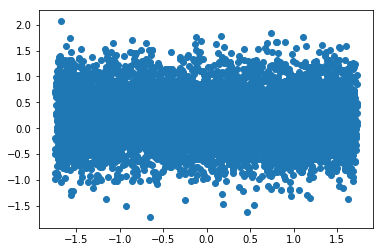

In [6]:

x=df['tau4']
y=df['target']
#x = (x - x.mean())/(x.std())
plt.scatter(x,y)
plt.show()

In [7]:
x=df.drop(columns=['target','id','Unnamed: 0'])
x_test_real=df1.drop(columns=['id','Unnamed: 0'])

In [8]:
y=df['target']

In [9]:
x_train, x_test ,y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [10]:
x_train.shape

(5034, 33)

In [11]:
y_train.shape

(5034,)

In [12]:
rf = RandomForestRegressor()

In [13]:
rf.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [14]:
y_pred=rf.predict(x_test)
y_pred_real=rf.predict(x_test_real)

In [15]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.5203914654301998

In [16]:
submission=pd.DataFrame({'':df1['Unnamed: 0'],'id' : df1['id'] , 'target' : y_pred_real})

In [17]:
submission.head()

,,id,target
0,0,2133,0.202743
1,1,6389,0.150059
2,2,4496,0.297336
3,3,2400,0.144113
4,4,4519,0.049422


In [18]:
submission.to_csv("Mag_14_Dolores_rf.csv",index=False)